In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): l


In [4]:
# Параметры пучка электронов и мишени
target = R(Material(50), 1e-2)
beams_energy = 0.075
brem = target.brem(beams_energy)
brem_e = brem * en

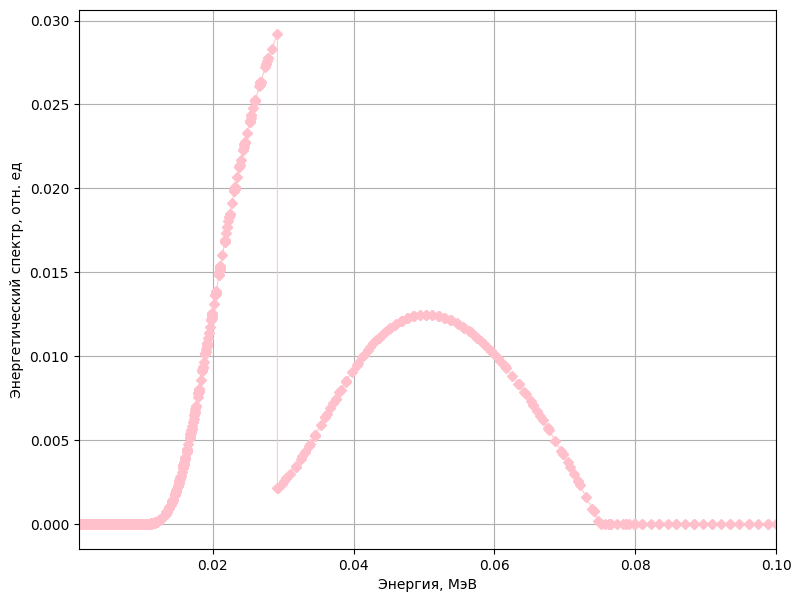

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', marker='D', lw='0.7', ms=5, color='pink')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [6]:
n = 11

In [8]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [9]:
EDGE.remove(EDGE[EDGE.index(Material(50).k_index())])

Значения максимумов в К-крае пропускания

In [24]:
space_1 = np.linspace(0.001, 0.9, 201)
for i, val in enumerate(space_1):
    space_1[i] = round(val, 5)
    
levels = []
levels.extend(space_1)

Спектральные характеристики чувствительности каналов

In [25]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [26]:
resp_ross = []

start_time = time.time()
for ind, j in enumerate(levels):
    print(f'({ind}), время: {round(time.time() - start_time, 5)}, секунд')
    resp = []
    for i in range(n, 100):
        resp.append(ross_by_k_level(i, i+1, j))
    resp_ross.append(resp)

(0), время: 0.00045, секунд
(1), время: 2.73393, секунд
(2), время: 5.58085, секунд
(3), время: 8.3907, секунд
(4), время: 11.26469, секунд
(5), время: 14.45148, секунд
(6), время: 17.25235, секунд
(7), время: 20.09844, секунд
(8), время: 22.82042, секунд
(9), время: 25.66553, секунд
(10), время: 28.7285, секунд
(11), время: 31.7893, секунд
(12), время: 35.08292, секунд
(13), время: 37.95397, секунд
(14), время: 40.79184, секунд
(15), время: 43.59357, секунд
(16), время: 46.62646, секунд
(17), время: 49.46255, секунд
(18), время: 52.60463, секунд
(19), время: 55.6079, секунд


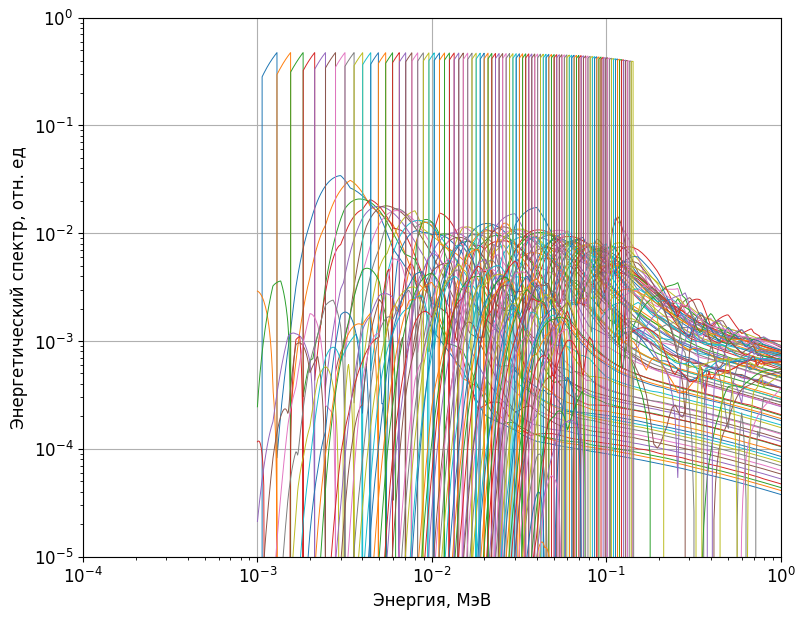

In [27]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_ross[10]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

In [ ]:
# np.save('resp_ross.npy', resp_ross)

Отклики каналов

In [28]:
from garipov_deconvolution import get_coeff_simpson

In [29]:
signals_simpson = []

start_time = time.time()

for j in range(len(resp_ross)):
    print(f'({j}), время: {round(time.time() - start_time, 5)}, секунд')
    signals = []
    for response in resp_ross[j]:
        signals.append(sum(get_coeff_simpson(response*brem_e, en, EDGE)[0]))
        
    signals_simpson.append(signals)

(0), время: 0.00042, секунд
(1), время: 2.73829, секунд
(2), время: 5.45039, секунд
(3), время: 8.22803, секунд
(4), время: 11.13407, секунд
(5), время: 14.0103, секунд
(6), время: 16.98643, секунд
(7), время: 19.7334, секунд
(8), время: 22.69215, секунд
(9), время: 25.39659, секунд
(10), время: 28.27522, секунд
(11), время: 31.23653, секунд
(12), время: 34.13204, секунд
(13), время: 36.99832, секунд
(14), время: 39.88499, секунд
(15), время: 42.6317, секунд
(16), время: 45.41852, секунд
(17), время: 48.07511, секунд
(18), время: 50.73709, секунд
(19), время: 53.39494, секунд


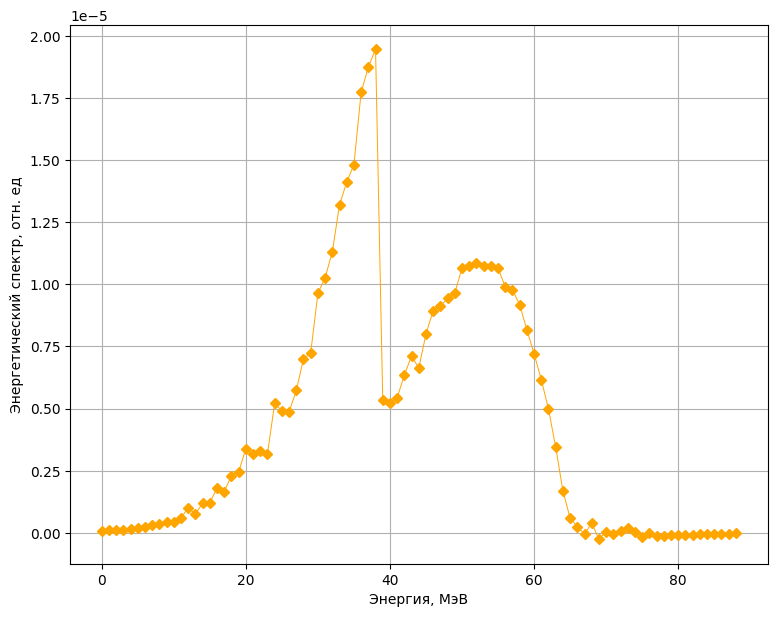

In [30]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(list(range(len(signals_simpson[1]))), signals_simpson[10], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

In [ ]:
# np.save('signals_simpson_ross.npy', signals_simpson)

Матрица задачи

In [33]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_ross)):
    print(f'({i}), время: {round(time.time() - start_time, 5)}, секунд')
    matrix = []
    
    for response in resp_ross[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.00065, секунд
(1), время: 2.73709, секунд
(2), время: 5.42599, секунд
(3), время: 8.24071, секунд
(4), время: 11.20872, секунд
(5), время: 14.2606, секунд
(6), время: 17.03812, секунд
(7), время: 19.93178, секунд
(8), время: 22.93902, секунд
(9), время: 25.84091, секунд
(10), время: 28.80287, секунд
(11), время: 31.7073, секунд
(12), время: 34.74869, секунд
(13), время: 37.55134, секунд
(14), время: 40.298, секунд
(15), время: 42.98332, секунд
(16), время: 45.82489, секунд
(17), время: 48.52042, секунд
(18), время: 51.40375, секунд
(19), время: 54.20761, секунд


In [34]:
from garipov_deconvolution import Gold

In [36]:
sp = [0 for i in range(len(signals_simpson))]
norm = [0 for i in range(len(signals_simpson))]
decb = [0 for i in range(len(signals_simpson))]
dev = [0 for i in range(len(signals_simpson))]

new_en = get_coeff_simpson(resp_ross[0][0], en, EDGE)[1]

In [37]:
import time
# восстановление спектра методом Голда на основании К-фильтров
start_time = time.time()
for j in range(len(signals_simpson)):
    sp[j], norm[j], dev[j] = Gold(Matrixs[j], signals_simpson[j], en, brem_e, new_en, 1, 20000, w=True, d=False)[:3]
    print(f'({j}), время: {time.time() - start_time}, секунд')

(0), время: 6.3093907833099365, секунд
(1), время: 13.110437154769897, секунд
(2), время: 22.653595685958862, секунд
(3), время: 31.77523374557495, секунд
(4), время: 39.474196434020996, секунд
(5), время: 50.741944313049316, секунд
(6), время: 59.679667472839355, секунд
(7), время: 65.14791941642761, секунд
(8), время: 72.41439914703369, секунд
(9), время: 78.97189855575562, секунд
(10), время: 93.09197092056274, секунд
(11), время: 101.84319925308228, секунд
(12), время: 113.00286388397217, секунд
(13), время: 120.18537211418152, секунд
(14), время: 124.92863154411316, секунд
(15), время: 129.4586672782898, секунд
(16), время: 134.80810451507568, секунд
(17), время: 139.6157102584839, секунд
(18), время: 143.96425819396973, секунд
(19), время: 148.20580554008484, секунд


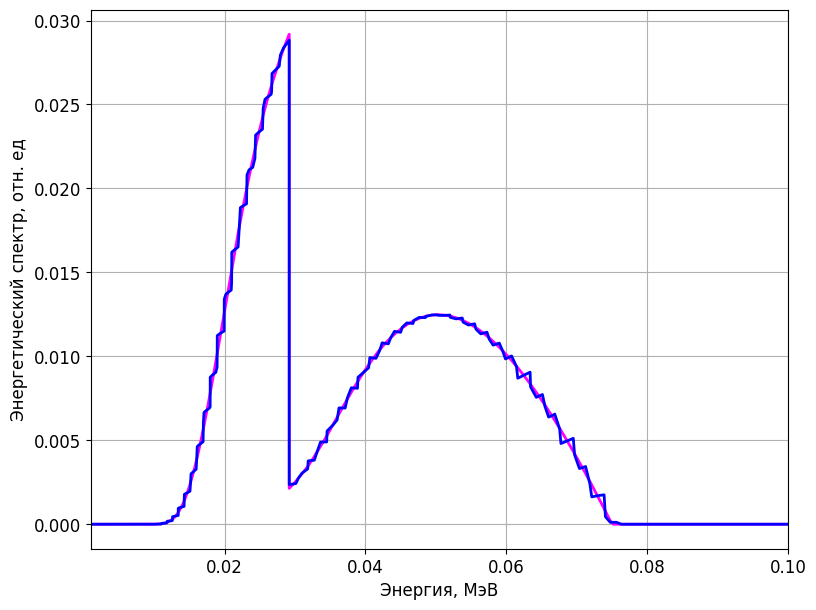

In [38]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', lw='2', ms=5, color='magenta')
ax.plot(new_en, sp[10], ls='-', lw='2', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

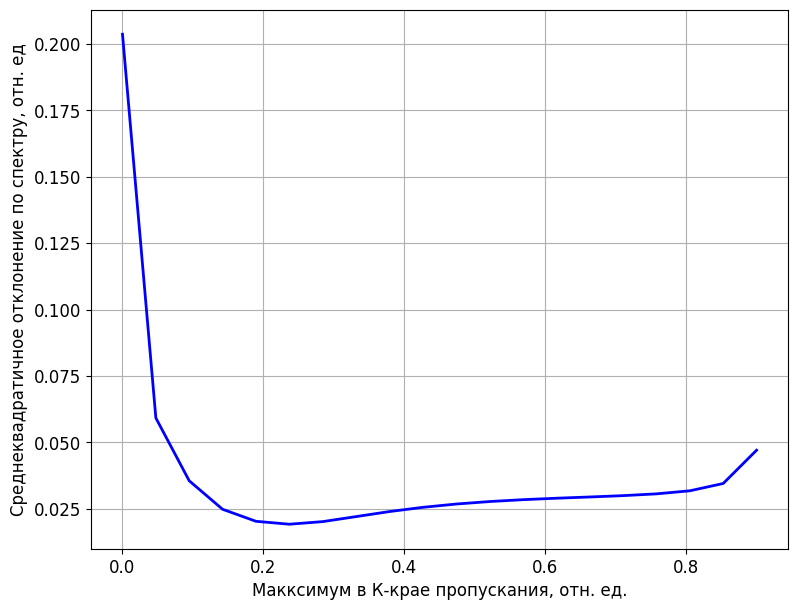

In [40]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(levels, dev, ls='-', lw='2', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Макксимум в К-крае пропускания, отн. ед.', fontsize=12)
ax.set_ylabel('Среднеквадратичное отклонение по спектру, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

# fig.savefig('Зависимость средней квадратичной невязки от максимума для краевых фильтров.jpg', bbox_inches='tight')

In [ ]:
# np.save('spectrums_ross.npy', sp)
# np.save('deviations_ross.npy', dev)